In [1]:
from datetime import datetime
import yfinance as yf
import pandas as pd
from get_histdata import GetHistData_yf
from getTickers import nifty50tickers
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

In [2]:
tickers=nifty50tickers()
tickers=["{}.NS".format(tick) for tick in tickers]
# print(tickers)

In [3]:
company = '^NSEI'
df= GetHistData_yf([company],'2000-01-01')
# df.head()

Getting historical using yfinance
Fetching data from 2000-01-01 00:00:00 to None
[*********************100%***********************]  1 of 1 completed
--- 1.3520605564117432 seconds ---


In [4]:
df.to_csv(r'Reports/20yr_hist_data.csv')

In [5]:
df2=pd.read_csv(r'Reports/20yr_hist_data.csv',index_col='Date')
df2.index=pd.to_datetime(df2.index)
df2

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,^NSEI
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,^NSEI
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,^NSEI
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,^NSEI
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,^NSEI
...,...,...,...,...,...,...,...
2022-09-12,17890.849609,17980.550781,17889.150391,17936.349609,17936.349609,228200,^NSEI
2022-09-13,18044.449219,18088.300781,18015.449219,18070.050781,18070.050781,259900,^NSEI
2022-09-14,17771.150391,18091.550781,17771.150391,18003.750000,18003.750000,365900,^NSEI


In [6]:
def historic_data(df2):
    returns_df = pd.DataFrame(columns=['Symbol', 'Year', 'Month','Returns'])

    for symbol in df2['Symbol'].unique():
        data_tick=df2[df2['Symbol']==symbol]
    #     print(data_tick['Symbol'][0])
        for year in data_tick.index.year.unique():
            dat_yr=data_tick[data_tick.index.year==year]
        #     print(year)
        #     print(dat_yr.index)
            for i in range(12):
                dat_month=dat_yr[dat_yr.index.month==i+1]

                if not dat_month.empty:
    #                 print(dat_month['Symbol'][0])
        #             print(dat_month['Close'])
        #             print(dat_month['Close'][0])
        #             print(dat_month['Close'][-1])
                    return_val=round(((dat_month['Close'][-1]-dat_month['Close'][0])/dat_month['Close'][0])*100,3)
                    dict_returns={'Symbol':dat_month['Symbol'][0], 'Year':year,'Month':i+1, 'Returns':return_val}
        #             if c == 0 :
        #                 returns_df=pd.DataFrame(dict_returns,index=[year])
        #             else :
        #                 df_tmp=pd.DataFrame(dict_returns,index=[year])
                    returns_df=pd.concat([returns_df,pd.DataFrame(dict_returns,index=[year])])
    return returns_df
        # dat_month['Close']

# data[data.index.month==11]

In [7]:
returns_df=historic_data(df2)
print(returns_df.head())
returns_df.to_csv(r'Reports/20yr_data.csv')

     Symbol  Year Month  Returns
2007  ^NSEI  2007     9   11.718
2007  ^NSEI  2007    10   16.408
2007  ^NSEI  2007    11   -1.768
2007  ^NSEI  2007    12    4.665
2008  ^NSEI  2008     1  -16.387


In [8]:
df_1=returns_df[(returns_df['Symbol']==company)]
df_2=df_1.drop(columns=['Symbol'],axis=1)

In [9]:
df_ret=pd.pivot_table(df_2, values = 'Returns', index=['Month'], columns = 'Year')
df_ret

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,
1,NaN,-16.387,-5.644,-6.692,-10.584,9.106,0.692,-2.116,4.925,-2.923,4.668,5.607,0.356,-1.809,-2.739,-1.622
2,NaN,-1.763,-0.108,0.461,-1.550,2.855,-5.098,4.584,0.537,-7.529,1.872,-4.757,-0.929,-4.323,1.736,-4.454
3,NaN,-4.411,12.950,4.626,5.640,-0.828,-0.650,7.759,-5.200,7.146,2.548,-3.295,6.503,-22.771,-0.480,5.172
4,NaN,8.996,13.515,-0.236,-1.314,-1.312,3.958,-0.367,-4.714,1.773,0.717,5.166,0.677,19.459,-1.589,-3.214
5,NaN,-6.849,21.756,-2.613,-4.003,-6.011,-0.223,7.994,1.221,4.538,3.301,0.169,1.689,3.086,6.482,-2.839
6,NaN,-14.749,-5.272,6.887,0.991,9.032,-1.635,3.380,-0.770,1.318,-0.990,0.169,-2.479,4.844,0.942,-4.494
7,NaN,11.194,6.809,2.213,-2.580,-0.940,-2.659,1.134,0.944,3.724,4.806,6.561,-6.301,6.169,0.530,8.927
8,NaN,-1.213,-1.046,-0.539,-9.350,0.343,-4.470,4.627,-6.693,1.733,-1.945,2.946,0.394,4.553,7.850,2.418
9,11.718,-9.829,9.915,10.199,-1.920,8.557,3.325,-0.784,2.094,-1.863,-1.863,-5.628,6.266,-1.942,3.173,-0.068


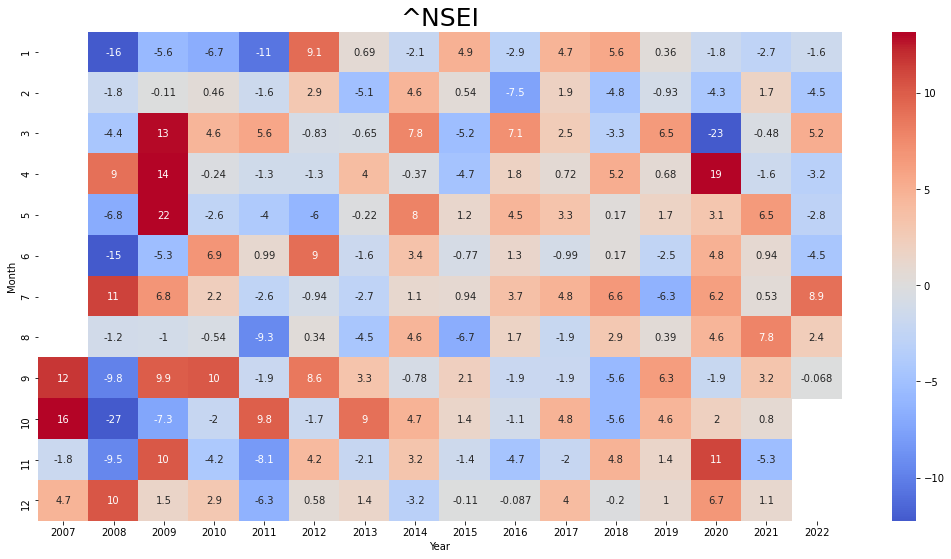

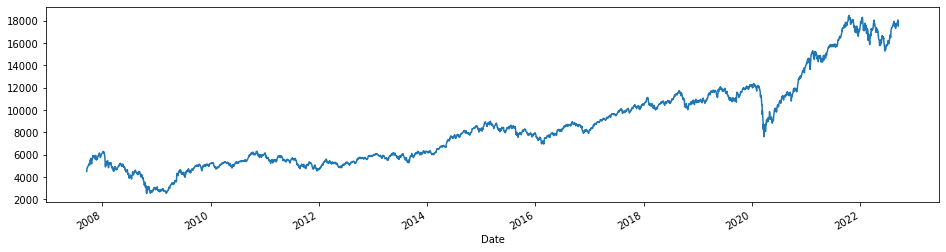

In [10]:
plt.figure(figsize=(18,9))
fig=sns.heatmap(df_ret,cmap="coolwarm",annot=True,center=0,robust=True)
plt.title(f"{df_1['Symbol'].unique()[0]}", fontsize = 25)
plt.show()
fig=fig.get_figure()
fig.savefig(f"{df_1['Symbol'].unique()[0]}.png")
df2['Adj Close'].plot(figsize=(16,4))